<a href="https://colab.research.google.com/github/AnthonyJacobM/Infodemics/blob/August_9_2021/infodemics_a_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install PyDSTool 

     |████████████████████████████████| 4.4 MB 8.7 MB/s 


In [2]:
# import relevant libraries
# import relative librariries!
# a test file to run SPO vs UPO
import PyDSTool as dst
from PyDSTool import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib as mpl
from scipy.integrate import odeint
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import argrelextrema

In [3]:
# define default initial conditions dictionary and parameter dictionaries!


# path to load and save figures
path = r'C:\Users\antho\Documents\Projects\Infodemics\Code\figures'


# dpi changes resolution of figures
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['savefig.dpi'] = 200

# fontsize is 18
mpl.rcParams['font.size'] = 18

# linewidth is 2
mpl.rcParams['lines.linewidth'] = 2.0

# initial parameter definition!
par_dict_def = {'recovery': 0.07, 'belief': 1.0,
                'risk': 0.10, 'protection': 0.90,
                'education': 0.33, 'misinformation': 0.10,
                'infection_good': 0.048, 'infection_bad': 0.37,
                'ace': 0}

# x1 ~ sg, x2 ~ sb, x3 ~ ib, x4 ~ v, x5 ~ phi
ics_dict_def = {'x1': 0.30, 'x2': 0.55,
                'x3': 0.01, 'x4': 0.0,
                'x5': 0.50}



# the two following are dictionaries used for revised infodemics time evolution in state variables and dictionary or parameters
par_dict_mike = {'recovery': 0.07, 'belief': 0.5,
                'risk': 0.10, 'protection': 0.55,
                'education': 0.66, 'misinformation': 0.10,
                'infection_good': 0.22, 'infection_bad': 0.37,
                'ace': 4}

ics_dict_mike = {'x1': 0.30, 'x2': 0.55,
                'x3': 0.01, 'x4': 0.0,
                'x5': 0.50}


# a new dictionary of parameters and initial conditions!
eq1_h1_ss = {'x1': 0.1652553343953094,
             'x2': 0.4608116686366218,
             'x3': 0.09068387295130048,
             'x4': 0.14189412748039304,
             'x5': 0.0003737491655869812}

# steady state branching point at risk bifurcation!
ss_bp_r = {'x1': 0.00057159126, 'x2': 0.18949223,
        'x3': 0.19704689, 'x4': 0.60433083,
        'x5': 1}

# parameters for branching point at risk bifurcation!
par_bp_r = {'recovery': 0.07, 'belief': 1.0,
            'risk': 0.34021985, 'protection': 0.90,
            'education': 0.33, 'misinformation': 0.10,
            'infection_good': 0.048, 'infection_bad': 0.37, 'ace': 0}

eq1_h2_par_dict = par_bp_r
eq1_h2_par_dict['risk'] = 0.342001918986597

eq1_lp1_par_dict = par_bp_r
eq1_lp1_par_dict['risk'] = 0.1295293020919909

eq1_h1_par_dict = par_bp_r
eq1_h1_par_dict['risk'] = 1.635295791362042

# final time of integration!
tend = 10_000

In [4]:
# define user supplied functions!

def plot_lc_heatmap(save_path = path, save_name = '\heatmap.jpg', data = array, zvar = 'inf', xpar = 'risk', ypar = 'misinformation', xlow = 1, xhigh = 2, ylow = 0, yhigh = 0.25, cmap = 'inferno', show_bool = True):
    """
    function to generte heatmaps with user input data
    :param save_path: path to save the figure
    :param save_name: file name unique to the figure
    :param data: user input numpy data
    :param xpar: parameter for the x in lc boundary
    :param ypar: parameter for the y in lc boundary
    :param xlow: parameter used for low value of x
    :param xhigh: parameter used for high value of x
    :param ylow: parameter used for low value of y
    :param yhigh: parameter used for high value of y
    :param cmap: color used for the heatmap; use one from the dictionary
    :param show_bool: boolean to show the figure
    :return: plotted heatmap!
    """
    # generate a new figure!
    #fig = plt.figure()
    #ax = fig.add_subplot(1,1,1)

    file_vac = f"{xpar}_{ypar}_vac.txt"
    file_bad = f"{xpar}_{ypar}_bad.txt"
    file_inf = f"{xpar}_{ypar}_inf.txt"
    file_xlimit = f"lc_{xpar}_{ypar}_xlimit.txt"
    file_ylimit = f"lc_{xpar}_{ypar}_ylimit.txt"

    data_vac = np.loadtxt(file_vac, delimiter=',', dtype=float)
    data_bad = np.loadtxt(file_bad, delimiter=',', dtype=float)
    data_inf = np.loadtxt(file_inf, delimiter=',', dtype=float)

    if zvar == 'vac':
        data = data_vac
        cbar_lab = 'Vaccinated'
        lc_col = 'r'
    elif zvar == 'inf':
        data = data_inf
        cbar_lab = 'Infected'
        lc_col = 'k'
    elif zvar == 'bad':
        data = data_bad
        cbar_lab = 'Bad'
        lc_col = 'b'
    else:
        data = data

    #xlimit = np.loadtxt(file_xlimit, delimiter=',', dtype=float)
    #ylimit = np.loadtxt(file_ylimit, delimiter=',', dtype=float)

    n = len(data)
    xlimit = [xlow, xhigh]
    ylimit = [ylow, yhigh]
    par_x_bin = np.linspace(xlimit[0], xlimit[-1], n)
    par_y_bin = np.linspace(ylimit[0], ylimit[-1], n)
    print(par_y_bin)
    row_label = [str(np.round(x0, 3)) for x, x0 in enumerate(par_x_bin)]
    col_label = [str(np.round(x0, 3)) for x, x0 in enumerate(par_y_bin)]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    if xpar == 'risk':
        xlab = '$r$'
    elif xpar == 'education':
        xlab = r'$\tilde{\chi}_{gb}$'
    elif xpar == 'misinformation':
        xlab = r'$\tilde{\chi}_{bg}$'
    elif xpar == 'infection_good':
        xlab = r'$\chi_{gb}$'
    elif xpar == 'infection_bad':
        xlab = r'$\hat{\chi}_{bb}$'
    elif xpar == 'protection':
        xlab = '$\delta$'
    elif xpar == 'recovery':
        xlab = r'$\gamma$'
    else:
        xlab = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    if ypar == 'risk':
        ylab = '$r$'
    elif ypar == 'education':
        ylab = r'$\tilde{\chi}_{gb}$'
    elif ypar == 'misinformation':
        ylab = r'$\tilde{\chi}_{bg}$'
    elif ypar == 'infection_good':
        ylab = r'$\chi_{gb}$'
    elif ypar == 'infection_bad':
        ylab = r'$\hat{\chi}_{bb}$'
    elif ypar == 'protection':
        ylab = '$\delta$'
    elif ypar == 'recovery':
        ylab = r'$\gamma$'
    else:
        ylab_ext = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    # generate spaces for col_label and row_label
    for z in range(0, len(row_label)):
        if z % 4 != 0:
            print(z % 4)
            row_label[z] = ''
            col_label[z] = ''



    df = pd.DataFrame(data, columns = col_label, index = row_label)
    s = sns.heatmap(df, cmap = cmap)
    #h_x = (xlimit[-1] - xlimit[0]) / 8
    #s.set_yticklabels(np.arange(xlimit[0], xlimit[-1], h_x))

    ax.set_xticklabels(col_label)
    ax.set_yticklabels(row_label)

    file_x = f"lc_{xpar}_{ypar}_xsol.txt"
    file_y = f"lc_{xpar}_{ypar}_ysol.txt"
    lc_x = np.loadtxt(file_x, delimiter=',', dtype=float)
    lc_y = np.loadtxt(file_y, delimiter=',', dtype=float)

    # get the axes for the linear spaced points
    xbin = ax.get_xticklabels()
    ybin = ax.get_yticklabels()

    xticks, xlabels = plt.xticks()
    yticks, ylabels = plt.yticks()

    # generate new xlabels and ylabels for the data depending on the lower and upper bounds of the parameters
    lb_x = xlimit[0]
    ub_x = xlimit[-1]
    lb_y = ylimit[0]
    ub_y = ylimit[-1]
    N_x = len(xlabels)
    N_y = len(ylabels)

    x_bin = np.linspace(lb_x, ub_x, N_x)
    y_bin = np.linspace(ub_y, lb_y, N_y)

    # generate new lables in a for loop
    xlabels_new = [str(np.round(x0,2)) for x, x0 in enumerate(x_bin)]
    ylabels_new = [str(np.round(y0,2)) for y, y0 in enumerate(y_bin)]

    # iterate using a for loop and replace the old labels
    for z, z0 in enumerate(xlabels):
        if z % 4 == 0:
            xlabels[z] = xlabels_new[z]
        else:
            xlabels[z] = ''

    for z, z0 in enumerate(ylabels):
        if z % 4 == 0:
            ylabels[z] = ylabels_new[z]
        else:
            ylabels[z] = ''



    # use the new labels and replace the old labels
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)

    # normalize x and y array's!
    lc_x_norm = (lc_x - np.min(lc_x)) / (np.max(lc_x) - np.min(lc_x))
    lc_y_norm = (lc_y - np.min(lc_y)) / (np.max(lc_y) - np.min(lc_y))

    sns.lineplot(lc_x, lc_y, color = lc_col)
    #plt.fill(lc_x, lc_y, color = lc_col, alpha = 0.25)
    plt.show()


    # fill in between to obtain the limit cycle boundary
    # generate a plot for the limit cycle boundary!
    #sns.lineplot(x = lc_y_norm, y = lc_x_norm, color = 'b', lw=5)
    # plt.fill(lc_x, lc_y, 'k')
    # plt.xlabel(xlab, fontsize=18)
    # plt.ylabel(ylab, fontsize=18)
    # plt.xlim([0, xmax])
    # plt.ylim([0, ymax])
    # file_name = f"\lc_{xpar}_{ypar}.jpeg"
    # plt.savefig(path + file_name, dpi=300)
    # plt.show()
    ax.plot(lc_x, lc_y, color = 'b', lw = 2)
    min_data = np.min(data)
    max_data = np.max(data)
    v_min = np.max([min_data, 0])
    v_max = np.min([max_data, 1])
    im = ax.imshow(data, cmap = cmap,
                   extent = [xlimit[0], xlimit[-1], ylimit[0], ylimit[-1]])

    #plt.xlim(xlimit[0], xlimit[-1])
    #plt.ylim(ylimit[0], ylimit[-1])

    #plt.xlabel(xlab, fontsize = 18)
    #plt.ylabel(ylab, fontsize = 18)




    if show_bool == True:
        file_name = save_path + save_name
        plt.savefig(file_name, dpi = 300)
        plt.show()

    fig, ax1 = plt.subplots(1, 1, figsize = (12,10), subplot_kw={'aspect': 'equal'})

    #ax1.set_yticks([int(j) for j in range(-4, 5)])
    #ax1.set_xticks([int(j) for j in range(-4, 5)])

    for label in ax1.get_xticklabels() + ax1.get_yticklabels():
        label.set_fontsize(15)
    for tick in ax1.get_xticklines() + ax1.get_yticklines():
        tick.set_markeredgewidth(2)
        tick.set_markersize(6)

    im = ax1.imshow(data, cmap=cmap, aspect = 0.10, vmin = v_min, vmax = v_max,
                    extent = [xlimit[0], xlimit[-1], ylimit[0], ylimit[-1]])
    ax1.set_xlim(xlimit[0], xlimit[-1])
    ax1.set_ylim(ylimit[0], ylimit[-1])

    plt.xlabel(xlab, fontsize=18)
    plt.ylabel(ylab, fontsize=18)

    #ax1.yaxis.set_tick_params(labelsize='xx-large')
    #ax1.xaxis.set_tick_params(labelsize='xx-large')


    divider = make_axes_locatable(ax1)
    #cax = divider.append_axes("right", size="3.5%", pad=0.3)
    #cb = plt.colorbar(im, cax=cax)
    #cb.set_label(cbar_lab, fontsize = 18)
    ax1.plot(lc_x, lc_y, color = lc_col, lw = 5)
    #ax1.fill(lc_x, lc_y, color = lc_col, alpha = 0.25)
    plt.show()

    plt.close(fig)

    return lc_x, lc_y


def sys_dx(X, t = 0, par_dict = eq1_h1_par_dict, ss_dict = eq1_h1_ss, xvar = 'x1', yvar  = 'x3'):
    """
    function to generate the phase field of the state varialbes and parameters
    :param X: 5 dimensional array
    :param t: time
    :param par_dict: dicitonary of parameters
    :param ss_dict: dictioanry of steady state variables
    :param xvar: x variable for the phase space
    :param yvar: y variable for the phase space
    :return: Z, the array of the data
    """
    x1_ss = ss_dict['x1']
    x2_ss = ss_dict['x2']
    x3_ss = ss_dict['x3']
    x4_ss = ss_dict['x4']
    x5_ss = ss_dict['x5']

    # unpack parameters
    risk = par_dict['risk']
    protection = par_dict['protection']
    belief = par_dict['belief']
    infection_bad = par_dict['infection_bad']
    infection_good = par_dict['infection_good']
    misinformation = par_dict['misinformation']
    education = par_dict['education']
    recovery = par_dict['recovery']
    a = par_dict['ace']

    if xvar == 'x1':
        x1 = X[0]
    else:
        x1 = x1_ss
    if xvar == 'x2':
        x2 = X[0]
    else:
        x2 = x2_ss
    if xvar == 'x3':
        x3 = x3_ss
    else:
        x3 = X[0]
    if xvar == 'x4':
        x4 = X[0]
    else:
        x4 = x4_ss
    if xvar == 'x5':
        x5 = X[0]
    else:
        x5 = x5_ss

    # -- y variable
    if yvar == 'x1':
        x1 = X[1]
    else:
        x1 = x1_ss
    if yvar == 'x2':
        x2 = X[1]
    else:
        x2 = x2_ss
    if yvar == 'x3':
        x3 = X[1]
    else:
        x3 = x3_ss
    if yvar == 'x4':
        x4 = X[1]
    else:
        x4 = x4_ss
    if yvar == 'x5':
        x5 = X[1]
    else:
        x5 = x5_ss


    # generate right hand side of the differential equations!
    x1rhs = recovery * (1 - x1 - x2 - x3 - x4) - x1 * (
                x5 + (infection_good + misinformation) * x3 + misinformation * x2)
    x2rhs = misinformation * x1 * (x2 + x3) - x3 * (infection_bad * x2 - recovery)
    x3rhs = x3 * (infection_bad * x2 - recovery - education * (x1 + (1 - x1 - x2 - x3 - x4)) + (
                1 - protection) * infection_good * x4)
    x4rhs = x5 * x1 - (1 - protection) * infection_good * x4 * x3
    x5rhs = belief * x5 * (1 - x5) * (a * (1 - x2 - x3 - x4) + (1 - x1 - x2 - x4) - risk * x4)

    if xvar == 'x1':
        v1 = x1rhs
    elif xvar == 'x2':
        v1 = x2rhs
    elif xvar == 'x3':
        v1 = x3rhs
    elif xvar == 'x4':
        v1 = x4rhs
    elif xvar == 'x5':
        v1 = x5rhs
    else:
        v1 = 0

    if yvar == 'x1':
        v2 = x1rhs
    elif yvar == 'x2':
        v2 = x2rhs
    elif yvar == 'x3':
        v2 = x3rhs
    elif yvar == 'x4':
        v2 = x4rhs
    elif yvar == 'x5':
        v2 = x5rhs
    else:
        v2 = 0

    Z = np.array([v1, v2])
    return Z


def generate_ode(par_dict = par_dict_def, ics_dict = ics_dict_def, tf = tend):
    """
    Function to generate an orinary differential equation for the system
    :param par_dict: dictionary for parameters
    :param ics_dict: dictionary for initial conditions
    :param tf: end time of simulation
    :return: generated ode for the system in PyDSTool
    """
    print('Generating ODE: executing ... generate_ode')

    # generate DSargs!
    DSargs = dst.args(name = 'infodemics_rev')

    # unpack parameters!!!!
    recovery = Par(par_dict['recovery'], 'recovery')
    belief = Par(par_dict['belief'], 'belief')
    risk = Par(par_dict['risk'], 'risk')
    protection = Par(par_dict['protection'], 'protection')
    education = Par(par_dict['education'], 'education')
    misinformation = Par(par_dict['misinformation'], 'misinformation')
    infection_good = Par(par_dict['infection_good'], 'infection_good')
    infection_bad = Par(par_dict['infection_bad'], 'infection_bad')
    ace = Par(par_dict['ace'], 'ace')

    DSargs.pars = [recovery, belief, risk, protection, education,
                   misinformation, infection_good, infection_bad, ace]

    # generate state variables!
    x1 = Var('x1') # sg
    x2 = Var('x2') # sb
    x3 = Var('x3') # ib
    x4 = Var('x4') # v
    x5 = Var('x5') # phi

    # generate initial condiitons!
    DSargs.ics = ics_dict

    # generate time domain!
    DSargs.tdomain = [0, tf]

    # generate bounds on parameters!
    DSargs.pdomain = {'education': [0, 1], 'misinformation': [0, 1],
                      'infection_bad': [0, 1], 'infection_ bad': [0, 1],
                      'protection': [0, 1], 'risk': [0, 6],
                      'belief': [0, 1], 'recovery': [0, 1],
                      'ace': [0, 5]}

    # generate bounds on state variables!
    DSargs.xdomain = {'x1': [0, 1], 'x2': [0, 1],
                      'x3': [0, 1], 'x4': [0, 1],
                      'x5': [0, 1]}

    # generate right hand side of the differential equations!
    x1rhs = recovery * (1 - x1 - x2 - x3 - x4) - x1 * (x5 + (infection_good + misinformation) * x3 + misinformation * x2)
    x2rhs = misinformation * x1 * (x2 + x3) - x3 * (infection_bad * x2 - recovery)
    x3rhs = x3 * (infection_bad * x2 - recovery - education * (x1 + (1 - x1 - x2 - x3 - x4)) + (1 - protection) * infection_good * x4)
    x4rhs = x5 * x1 - (1 - protection) * infection_good * x4 * x3
    
    x5rhs = belief * x5 * (1 - x5) * (ace * (1 - x2 - x3 - x4) + (1 - x1 - x2 - x4) - risk * x4)

    DSargs.varspecs = {'x1': x1rhs, 'x2': x2rhs,
                       'x3': x3rhs, 'x4': x4rhs,
                       'x5': x5rhs}

    DSargs.fnspecs = {'infected': (['t', 'sg', 'sb', 'v'],'1 - sg - sb - v'),
                       'bad': (['t', 'sb', 'ib'], 'sb + ib'),
                       'good': (['t', 'sb', 'ib', 'v'], '1 - sb - ib - v')}

    # change any default numerical parameters
    DSargs.algparams = {'max_pts': 10_000, 'stiff': True}

    # generate the ordinary differential equations!
    ode = dst.Vode_ODEsystem(DSargs)

    return ode




def generate_heat_map_limit_cycle(PC, curve = 'EQmisinformation', special_point = 'H1', xpar = 'misinformation', ypar = 'education', par_dict = eq1_h1_par_dict, ss_dict = {}, max_n_points = 35, curve_type = 'H-C1', name_curve = 'HO1', n_bin = 10, tend = 4_000, eps = 0.01, load_bool = False):
    """
    a function to generate the limit cycle boundary for two parameters
    :param PC: Python Continuation used for initializing at a hop-f point!
    :param curve: the curve named for the 1d bifurcation in xpar
    :param special_point: H1, H2, etc. a hopf bifurcation obtained in the previous plots
    :param xpar: parameter along the x axis that will be varied (used as a bifurcation parameter in the PC)
    :param ypar: parameter along the y axis that will be varied
    :param par_dict: dictionary for the parameters used to obtain the Hopf bifurcation!
    :param ss_dict: dictionary for steady state values obtained at the initializer
    :param max_n_points: maximum number of points in the continuation
    :param curve_type: type of method: H-C1 or H-C2
    :param name_curve: name of the curve used for the 2d bifurcation
    :param tend: final time for numerical simulation
    :return: plotted figure in matplotlib
    """
    # generate a figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    if xpar == 'risk':
        xlab = '$r$'
    elif xpar == 'education':
        xlab = r'$\tilde{\chi}_{gb}$'
    elif xpar == 'misinformation':
        xlab = r'$\tilde{\chi}_{bg}$'
    elif xpar == 'infection_good':
        xlab = r'$\chi_{gb}$'
    elif xpar == 'infection_bad':
        xlab = r'$\hat{\chi}_{bb}$'
    elif xpar == 'protection':
        xlab = '$\delta$'
    elif xpar == 'recovery':
        xlab = r'$\gamma$'
    elif xpar == 'ace':
        xlab = '$a$'
    else:
        xlab = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    if ypar == 'risk':
        ylab = '$r$'
    elif ypar == 'education':
        ylab = r'$\tilde{\chi}_{gb}$'
    elif ypar == 'misinformation':
        ylab = r'$\tilde{\chi}_{bg}$'
    elif ypar == 'infection_good':
        ylab = r'$\chi_{gb}$'
    elif ypar == 'infection_bad':
        ylab = r'$\hat{\chi}_{bb}$'
    elif ypar == 'protection':
        ylab = '$\delta$'
    elif ypar == 'recovery':
        ylab = r'$\gamma$'
    elif ypar == 'ace':
        ylab = '$a$'
    else:
        ylab_ext = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    # generate a continuation!
    if load_bool == False:
        PC_2d = generate_bifurcation_2d(PC, special_point=special_point, xpar=xpar,                                                          ypar=ypar, par_dict = par_dict,
                                                          name_curve=name_curve, max_n_points=max_n_points, curve_type=curve_type, curve = curve)

        # get the data obtained in the figure!
        lc_x = PC_2d[name_curve].sol[xpar]
        lc_y = PC_2d[name_curve].sol[ypar]

        # get state variables along the boundary
        x1_ss = PC_2d[name_curve].sol['x1']
        x2_ss = PC_2d[name_curve].sol['x2']
        x3_ss = PC_2d[name_curve].sol['x3']
        x4_ss = PC_2d[name_curve].sol['x4']
        x5_ss = PC_2d[name_curve].sol['x5']
    else:
        file_x = f"lc_{xpar}_{ypar}_xsol.txt"
        file_y = f"lc_{xpar}_{ypar}_ysol.txt"
        lc_x = np.loadtxt(file_x, delimiter = ',', dtype = float)
        lc_y = np.loadtxt(file_y, delimiter = ',', dtype = float)

    # get parameter bounds for limit cycle boundary
    lc_x_lb = np.min(lc_x)
    lc_x_ub = np.max(lc_x)
    lc_y_lb = np.min(lc_y)
    lc_y_ub = np.max(lc_y)



    # fill in between to obtain the limit cycle boundary
    # generate a plot for the limit cycle boundary!
    plt.plot(lc_x, lc_y, 'b', lw = 5)
    plt.fill(lc_x, lc_y, 'k')
    plt.xlabel(xlab, fontsize = 18)
    plt.ylabel(ylab, fontsize = 18)


    # get current axes limits
    xlimit = ax.get_xlim()
    ylimit = ax.get_ylim()

    # plot the boundary!
    file_name = f"\Boundary_lc_{xpar}_{ypar}.jpeg"
    plt.savefig(path + file_name, dpi = 300)
    plt.show()


    # obtain the lower bound and upper bound in each parameter
    par_x_lb = xlimit[0]
    par_x_ub = xlimit[-1]
    par_y_lb = ylimit[0]
    par_y_ub = ylimit[-1]
    # generate parameter array's for to obtain the limit
    par_x_bin = np.linspace(par_x_lb, par_x_ub, n_bin)
    par_y_bin = np.linspace(par_y_lb, par_y_ub, n_bin)
    # generate arrays for infected, vaccinated and bad
    inf_bin = np.zeros((n_bin, n_bin))
    vac_bin = np.zeros((n_bin, n_bin))
    bad_bin = np.zeros((n_bin, n_bin))





    # loop through parameter x and parameter y bin's and get the peak or steady state values
    for x, x0 in enumerate(par_x_bin):
        for y, y0 in enumerate(par_y_bin):
            print(x, y, 'out of', n_bin, n_bin)
            # change parameters in x and y
            par_dict[xpar] = x0
            par_dict[ypar] = y0

            inf_peak = 1.25  # initialized to go inside the loop
            vac_peak = 1.25
            bad_peak = 1.25
            # generate a while loop when the peaks are bounded by 1
            while vac_peak > 1 or inf_peak > 1 or bad_peak > 1:
                ss_dict_perturbed = {}
                eps0 = eps

                # generate new initial conditions!
                for k, v in ss_dict.items():
                    sgn = np.sign(np.random.rand(1) - 1 / 2)[0]
                    ss_dict_perturbed[k] = np.round(v, 6) * (1 + sgn * eps0 * np.random.rand(1))[0]  # perturb new steady state

                """# generate new system
                ode = generate_ode(par_dict, ss_dict_perturbed, tf=tend)  # generate a pointset
                pts = ode.compute('sample').sample(dt=1)
                # get state variables
                sg = pts['x1']
                sb = pts['x2']
                ib = pts['x3']
                v = pts['x4']"""


                z, t = gen_sys(par_dict = par_dict, ics_dict = ss_dict_perturbed, tf = tend)
                sg, sb, ib, v, phi = z.T
                
                

                inf = 1 - (sg + sb + v) # get infected
                bad = sb + ib # get bad


                # get all the peaks of infected and bad
                peak_inf_idx = argrelextrema(inf, np.greater)[0]
                peak_bad_idx = argrelextrema(bad, np.greater)[0]
                peak_vac_idx = argrelextrema(v, np.greater)[0]


                # get the maximum of all the peaks
                if len(peak_inf_idx) > 0:
                    inf_peak = np.average(inf[peak_inf_idx])
                else:
                    inf_peak = inf[-1]
                if len(peak_bad_idx) > 0:
                    bad_peak = np.average(bad[peak_bad_idx])
                else:
                    bad_peak = bad[-1]
                if len(peak_vac_idx) > 0:
                    vac_peak = np.average(v[peak_vac_idx])
                else:
                    vac_peak = v[-1]

                # if they are all bounded continue
                if vac_peak <= 1 and inf_peak <= 1 and bad_peak <= 1:
                    break
                else:
                    continue

            # append to the data!
            inf_bin[x][y] = inf_peak
            bad_bin[x][y] = bad_peak
            vac_bin[x][y] = vac_peak
            print('inf: ', inf_peak, 'vac: ', vac_peak, 'bad: ', bad_peak)

    # save the data!
    np.savetxt(f"{xpar}_{ypar}_inf.txt", inf_bin, delimiter = ',')
    np.savetxt(f"{xpar}_{ypar}_bad.txt", bad_bin, delimiter = ',')
    np.savetxt(f"{xpar}_{ypar}_vac.txt", vac_bin, delimiter = ',')

    # save the limit cycle boundaries!
    # save the data to a numpy array for later
    np.savetxt(f"lc_{xpar}_{ypar}_xsol.txt", lc_x, delimiter=',')
    np.savetxt(f"lc_{xpar}_{ypar}_ysol.txt", lc_y, delimiter=',')
    #np.savetxt(f"lc_{xpar}_{ypar}_xlimit.txt", np.array(xlimit), delimiter=',')
    #np.savetxt(f"lc_{xpar}_{ypar}_ylimit.txt", np.array(ylimit), delimiter=',')




def plot_nullclines(option='A', PTS='', par_dict=eq1_h1_par_dict, ss_dict=eq1_h1_ss, n_bin=100, xlow=0, xhigh=1.0,
                        ylow=0, yhigh=1.0, quiv_bool=True, ext_bool=False,
                        evecs_bool=False, evecs=None, ics_dict={}, par = 'risk'):
    """
    function to generate nullclines with a quiver plot field determined using sys_dx function
    :param option: 'A' for SG vs IB, 'B' for SB vs IB, 'C' for IB vs V
    :param PTS: pointset, if '', then generate it
    :param par_dict: dictionary of paramaeters
    :param ss_dict: dicitonary of steay state values
    :param n_bin: number of elements in the np array
    :param xlow: lower bound on x variables
    :param xhigh: upper bound on x variable
    :param ylow: lower bound on y variable
    :param yhigh: upper bound on y variable
    :param quiv_bool: boolean for the quiver plot of the nullcline
    :param ext_bool: boolean to extend the current nullcline to include a second fixed point
    :param ss_dict_2: second dictionary for steady state values
    :param par_dict_2: second dictionary for parameter values
    :param evecs_bool: boolean for the eigenvectors used to determine the trajectory of the plane
    :param evecs: user supplied eigenvectors to determine the flow about the fised point
    :param ics_dict: dictionary containing initial conditions
    :return: plotted nullclines in matplotlib figures
    """
    # unpack steady state values
    x1_ss = ss_dict['x1']
    x2_ss = ss_dict['x2']
    x3_ss = ss_dict['x3']
    x4_ss = ss_dict['x4']
    x5_ss = ss_dict['x5']

    ig_ss = 1 - (x1_ss + x2_ss + x3_ss + x4_ss)

    # unpack parameters
    risk = par_dict['risk']
    protection = par_dict['protection']
    belief = par_dict['belief']
    infection_bad = par_dict['infection_bad']
    infection_good = par_dict['infection_good']
    misinformation = par_dict['misinformation']
    education = par_dict['education']
    recovery = par_dict['recovery']
    """
       H Point found
       ==========================
       0 :
       x1  =  0.20993799300477495
       x2  =  0.48221092545757344
       x3  =  0.07073195797121161
       x4  =  0.1168184171123022
       x5  =  0.00018891967673741587
       risk  =  1.6352957791039242
       """

    if ics_dict == {}:
        x1_0 = 0.20
        x2_0 = 0.50
        x3_0 = 0.001
        x4_0 = 0.14
        x5_0 = 0.0003
        ics = {'x1': x1_0, 'x2': x2_0,
               'x3': x3_0, 'x4': x4_0, 'x5': x5_0}
    else:
        ics = ics_dict

    if PTS == '':
        ode = generate_ode(par_dict=par_dict, ics_dict=ics, tf=10_000)
        pts = ode.compute('nulls_traj').sample(dt=5)
    else:
        pts = PTS
    # pts, ss_dict = generate_pointset(ODE = ode, save_bool=False)
    x1_traj = pts['x1']
    x2_traj = pts['x2']
    x3_traj = pts['x3']
    x4_traj = pts['x4']
    x5_traj = pts['x5']
    t = pts['t']

    # determine the functions of nullclines
    if option == 'A' or option == '':
        # sg vs sb
        a = 0  # eigenvector component in x
        b = 1  # eigenvector component in y

        xlab = r'$S_G$'  # label for x axis
        ylab = r'$S_B$'  # label for y axis

        xnull_lab = r'$N_{S_G}$'  # label for legend
        ynull_lab = r'$N_{S_B}$'

        x_traj = x1_traj
        y_traj = x2_traj

        dx_x = 'x1'  # used for quiver
        dx_y = 'x2'

        x_ss = x1_ss  # steady state value on x
        y_ss = x2_ss  # steady state value on y

        x_array = np.linspace(xlow, xhigh, n_bin)
        y_array = np.linspace(ylow, yhigh, n_bin)

        # x null --> solve for y = x2
        x_null = (recovery * ig_ss - x_array * (x5_ss + (infection_good + misinformation) * x3_ss)) / (
                    misinformation * x_array)
        # y null --> solve for x = x1
        y_null = (x3_ss * (infection_bad * y_array - recovery)) / (misinformation * (y_array + x3_ss))

    elif option == 'B':
        # sb vs ib
        a = 1  # eigenvector component in x
        b = 2  # eigenvector component in y

        xlab = r'$S_B$'  # label for x axis
        ylab = r'$I_B$'  # label for y axis

        xnull_lab = r'$N_{S_B}$'  # label for legend
        ynull_lab = r'$N_{I_B}$'

        x_traj = x2_traj
        y_traj = x3_traj

        dx_x = 'x2'  # used for quiver
        dx_y = 'x3'

        x_ss = x2_ss  # steady state value on x
        y_ss = x3_ss  # steady state value on y

        x_array = np.linspace(xlow, xhigh, n_bin)
        y_array = np.linspace(ylow, yhigh, n_bin)

        # x null --> solve for y = x3
        x_null = (misinformation * x1_ss * x_array) / (infection_bad * x_array - recovery - misinformation * x1_ss)
        # y null --> solve for x = x2
        y_null = (recovery + education * (x1_ss + ig_ss) - x5_ss * x1_ss / y_array) / infection_bad

    elif option == 'C':
        # ib vs v
        a = 2  # eigenvector component in x
        b = 3  # eigenvector component in y

        xlab = r'$I_B$'  # label for x axis
        ylab = r'$V$'  # label for y axis

        xnull_lab = r'$N_{I_B}$'  # label for legend
        ynull_lab = r'$N_{V}$'

        x_traj = x3_traj
        y_traj = x4_traj

        dx_x = 'x3'  # used for quiver
        dx_y = 'x4'

        x_ss = x3_ss  # steady state value on x
        y_ss = x4_ss  # steady state value on y

        x_array = np.linspace(xlow, xhigh, n_bin)
        y_array = np.linspace(ylow, yhigh, n_bin)

        # x null --> solve for y = x4
        # x_null = (misinformation * x2_ss - recovery + education * (x2_ss + x_array - 1)) / ((protection - 1) * infection_good)
        x_null = np.ones(n_bin) * (recovery + education * (x1_ss + ig_ss) - infection_bad * x2_ss) / ((1 - protection) * infection_good)
        # y null --> solve for x = x3
        y_null = (x5_ss * x1_ss) / ((1 - protection) * infection_good * y_array)

    elif option == 'D':
        # ig vs ib
        a = None  # eigenvector component in x
        b = 3  # eigenvector component in y

        xlab = r'$I_G$'  # label for x axis
        ylab = r'$I_B$'  # label for y axis

        xnull_lab = r'$N_{I_G}$'  # label for legend
        ynull_lab = r'$N_{I_B}$'

        x_traj = 1 - (x1_traj + x2_traj + x3_traj)
        y_traj = x4_traj

        dx_x = 'x3'  # used for quiver
        dx_y = 'x4'

        x_ss = x3_ss  # steady state value on x
        y_ss = x4_ss  # steady state value on y

        x_array = np.linspace(xlow, xhigh, n_bin)
        y_array = np.linspace(ylow, yhigh, n_bin)

        # x null --> solve for y = x4
        x_null = (misinformation * x2_ss - recovery + education * (x2_ss + x_array - 1)) / (
                (protection - 1) * infection_good)

        # y null --> solve for x = x3
        y_null = (x5_ss * x1_ss) / ((1 - protection) * infection_good * y_array)

    elif option == 'E':
        # phi vs v
        a = 5  # eigenvector component in x
        b = 4  # eigenvector component in y

        xlab = r'$\phi$'  # label for x axis
        ylab = r'$V$'  # label for y axis

        xnull_lab = r'$N_{\phi}$'  # label for legend
        ynull_lab = r'$N_{V}$'

        x_traj = x5_traj
        y_traj = x4_traj

        dx_x = 'x5'  # used for quiver
        dx_y = 'x4'

        x_ss = x5_ss  # steady state value on x
        y_ss = x4_ss  # steady state value on y

        x_array = np.linspace(xlow, xhigh, n_bin)
        y_array = np.linspace(ylow, yhigh, n_bin)

        # x null --> solve for y = x4
        x_null = (ig_ss + x3_ss + a * ig_ss) / (risk - a * (1 - protection) * infection_good * x3_ss / x_array)

        # y null --> solve for x = x5
        y_null = (1 - protection) * x3_ss * x_array / x1_ss

    # generate a phase field
    if quiv_bool:
        x, y = np.linspace(xlow, xhigh, 15), np.linspace(ylow, yhigh, 15)
        x1, y1 = np.meshgrid(x, y)
        dx1, dy1 = sys_dx([x1, y1, x1, y1, x1, y1], par_dict=par_dict, ss_dict=ss_dict, xvar=dx_x, yvar=dx_y)
        # normalize growth rate!
        M = (np.hypot(dx1, dy1))
        M[M == 0] = 1  # avoid division of zero
        dx1 /= M
        dy1 /= M  # normalize arrows

        plt.quiver(x, y, dx1, dy1, M, pivot='mid')

    z = int(len(x1_traj) / 4)
    plt.plot(x_array, x_null, 'b', label=xnull_lab)
    plt.plot(y_null, y_array, 'r', label=ynull_lab)

    if dx_x == 'x3':
        plt.vlines(x=0, ymin=ylow, ymax=yhigh, color='b')
    if dx_y == 'x3':
        plt.hlines(y=0, xmin=xlow, xmax=xhigh, color='r')

    # plot steady state values!
    plt.plot(x_ss, y_ss, 'ko', fillstyle='left', ms=10)

    # plot eigenvectors, if boolean is true
    if evecs_bool == True:
        evec_real = evecs.real  # real part of the eigenvalue
        # determine the components to use of the eigenvalue depending on the x and y values used for the nullclines
        v1 = np.array([evec_real[a][a], evec_real[b][a]])
        v2 = np.array([evec_real[b][a], evec_real[b][b]])

        # determine the angle between the eigenvectors
        evecs_angle = np.arccos(np.inner(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))) * 180 / np.pi

        # plot the eigenvector's starting from the fied point
        plt.arrow(x_ss, y_ss, v1[0], v1[1], color='b', ls='--')
        plt.arrow(x_ss, y_ss, v2[0], v2[1], color='r', ls='--')

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xlim([xlow, xhigh])
    plt.ylim([ylow, yhigh])
    plt.plot(x_traj[0:], y_traj[0:], 'k')
    plt.legend()
    file_name = f"\{par}_{dx_x}_{dx_y}_nullcline.jpeg"
    plt.savefig(path + file_name, dpi = 300)
    plt.show()

    # time plot
    """plt.plot(t, x1_traj, 'b-', label='$S_G$')
    plt.plot(t, x2_traj, 'r--', label='$S_B$')
    plt.plot(t, x3_traj, 'r', label='$I_B$')
    plt.plot(t, x4_traj, 'b:', label='$V$')
    plt.plot(t, x5_traj, 'm:', label='$\phi$')
    plt.legend()
    plt.xlabel('t (Days)')
    plt.ylabel('Fraction of the Population')
    plt.show()"""




def generate_risk_bifurcation(ode, ics_dict = eq1_h1_ss, par_dict = eq1_h1_par_dict, max_points = 250, tend = 1000):
    """
    function to generate a bifurcation for risk of vaccination relative to infection
    :param ics_dict: dictionary of initial conditions
    :param par_dict: dictionary of parameters
    :param max_points: maximum number of points for a bifurcation
    :param tend: final point in the time domain
    :return: plotted bifurcation
    """
    # pts, ss_dict = generate_pointset(ode)

    # use the initial conditions at the steady state
    # ode.set(ics = ss_dict)

    # generate a coninuation curve
    PC = ContClass(ode)
    PCargs = dst.args(name = 'EQrisk', type = 'EP-C')
    PCargs.freepars = ['risk']  # should be one of the parameters from DSargs.pars --

    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = max_points  # The following 3 parameters are set after trial-and-error
    # choose carefully
    PCargs.MaxStepSize = 0.005
    PCargs.MinStepSize = 1e-5
    PCargs.StepSize = 1e-4
    PCargs.LocBifPoints = 'all'  # detect limit points / saddle-node bifurcations
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!
    PCargs.verbosity = 2
    PCargs.StopAtPoints = 'B'
    # generate a numerical continuation
    PC.newCurve(PCargs)

    # continue backwards and forwards!
    PC['EQrisk'].forward()
    PC['EQrisk'].backward()

    # update the curve along the branching point!
    """eq_risk_bp_ss = {'x1': 0.0005714445346933421,
                 'x2': 0.1893893682498801,
                 'x3': 0.1968691906600376,
                 'x4': 0.6047210552785887,
                 'x5': 1.0}

    eq_risk_bp_par = {'recovery': 0.07, 'belief': 1.0,
                'risk': 0.34021985, 'protection': 0.90,
                'education': 0.33, 'misinformation': 0.10,
                'infection_good': 0.048, 'infection_bad': 0.37}
    ode.set(ics = eq_risk_bp_ss,
           pars = eq_risk_bp_par)"""

    """PCargs.initpoint = {'x1': 0.0005714445346933421,
                 'x2': 0.1893893682498801,
                 'x3': 0.1968691906600376,
                 'x4': 0.6047210552785887,
                 'x5': 1.0,
                 'risk': 0.0}"""

    PCargs.name = 'EQrisk2'
    PCargs.type = 'EP-C'
    PCargs.initpoint = {'x1': 0.0005714445346933421,
                        'x2': 0.1893893682498801,
                        'x3': 0.1968691906600376,
                        'x4': 0.6047210552785887,
                        'x5': 1.0,
                        'risk': 0.0}

    PCargs.freepars = ['risk']  # should be one of the parameters from DSargs.pars
    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = int(1.0 * max_points)  # The following 3 parameters are set after trial-and-error
    PCargs.MaxStepSize = 0.01
    PCargs.MinStepSize = 1e-5
    PCargs.StepSize = 0.1e-3
    PCargs.StopAtPoints = 'B'
    PCargs.LocBifPoints = 'BP'  # detect limit points / saddle-node bifurcations
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!

    # PC.update(PCargs)
    PC.newCurve(PCargs)
    PC['EQrisk2'].forward()

    # begin plotting
    yvar_array = ['x4', 'x3', 'x2', 'x1']
    ylab_array = [r'$V$', r'$I_B$', r'$S_B$', r'$S_G$']
    col_array = ['b', 'r', 'k', 'orange']
    for z, z0 in enumerate(yvar_array):
        # display the bifurcation!
        PC.display(['risk', yvar_array[z]], stability=True, color=col_array[z])  # x variable vs y variable!
        # disable the boundary
        PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='P')
        PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='B')
        plt.title('')  # no title
        plt.ylabel(ylab_array[z])
        plt.xlabel(r'$r$')
        file_name = f"\Risk_{z0}.jpeg"
        plt.savefig(path + file_name, dpi = 300)
        plt.show()

    return PC




# --
def generate_misinformation_bifurcation(ode, ics_dict=eq1_h1_ss, par_dict=eq1_h1_par_dict, max_points=200,
                                        tend=1000):
    """
    function to generate a bifurcation for risk of vaccination relative to infection
    :param ODE: generated previously
    :param ics_dict: dictionary of initial conditions
    :param par_dict: dictionary of parameters
    :param max_points: maximum number of points for a bifurcation
    :param tend: final point in the time domain
    :return: plotted bifurcation
    """
    # ode = generate_ode(par_dict, ics_dict, tf=tend)  # generate a pointset
    # pts, ss_dict = generate_pointset(ode)

    # use the initial conditions at the steady state
    # ode.set(ics = ss_dict)

    # generate a coninuation curve
    PC = ContClass(ode)
    PCargs = dst.args(name='EQmisinformation', type='EP-C')
    PCargs.freepars = ['misinformation']  # should be one of the parameters from DSargs.pars --

    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = max_points  # The following 3 parameters are set after trial-and-error
    # choose carefully
    PCargs.MaxStepSize = 0.01
    PCargs.MinStepSize = 1e-5
    PCargs.StepSize = 1e-3
    PCargs.LocBifPoints = 'all'  # detect limit points / saddle-node bifurcations
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!
    PCargs.verbosity = 2
    PCargs.StopAtPoints = 'B'
    # generate a numerical continuation
    PC.newCurve(PCargs)

    # continue backwards and forwards!
    PC['EQmisinformation'].forward()
    PC['EQmisinformation'].backward()

    PCargs.name = 'EQmisinformation2'
    PCargs.type = 'EP-C'

    # PCargs.initpoint = {'x1': 0.00045686505623685283,
    #                    'x2': 0.1894318195395322,
    #                    'x3': 0.1968176793050778,
    #                    'x4': 0.6064537764311808,
    #                    'x5': 0.9999999999999999,
    #                    'misinformation': 0.35}

    dict = {'x1': 0.0005739017705169474,
            'x2': 0.18964617945844123,
            'x3': 0.19705914738387598,
            'x4': 0.6039697520726657,
            'x5': 0.9999999999999999,
            'misinformation': 0.15}

    PCargs.initpoint = dict

    PCargs.freepars = ['misinformation']  # should be one of the parameters from DSargs.pars
    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = int(1.2 * max_points)  # The following 3 parameters are set after trial-and-error
    PCargs.MaxStepSize = 0.005
    PCargs.MinStepSize = 1e-7
    PCargs.StepSize = 1e-4
    PCargs.StopAtPoints = 'B'
    PCargs.LocBifPoints = 'all'  # detect limit points / saddle-node bifurcations
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!

    # PC.update(PCargs)
    PC.newCurve(PCargs)
    # PC['EQmisinformation2'].forward()
    # PC['EQmisinformation2'].backward()

    # begin plotting
    yvar_array = ['x4', 'x3', 'x2', 'x1']
    ylab_array = [r'$V$', r'$I_B$', r'$S_B$', r'$S_G$']
    col_array = ['b', 'r', 'k', 'orange']
    for z, z0 in enumerate(yvar_array):
        # display the bifurcation!
        PC.display(['misinformation', yvar_array[z]], stability=True, color=col_array[z])  # x variable vs y variable!
        # disable the boundary
        PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='P')
        PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='B')
        plt.title('')  # no title
        plt.ylabel(ylab_array[z])
        plt.xlabel(r'$\tilde{\chi}_{bg}$')
        file_name = f"\misinformation_{z0}.jpeg"
        plt.savefig(path + file_name, dpi = 300)
        plt.show()

    return PC



def generate_education_bifurcation(ode, ics_dict = eq1_h1_ss, par_dict = eq1_h1_par_dict, max_points = 200, tend = 1000):
    """
    function to generate a bifurcation for risk of vaccination relative to infection
    :param ODE: generated previously
    :param ics_dict: dictionary of initial conditions
    :param par_dict: dictionary of parameters
    :param max_points: maximum number of points for a bifurcation
    :param tend: final point in the time domain
    :return: plotted bifurcation
    """
    #ode = generate_ode(par_dict, ics_dict, tf = tend)    # generate a pointset
    # pts, ss_dict = generate_pointset(ode)

    # use the initial conditions at the steady state
    # ode.set(ics = ss_dict)

    # generate a coninuation curve
    PC = ContClass(ode)
    PCargs = dst.args(name = 'EQeducation', type = 'EP-C')
    PCargs.freepars = ['education']  # should be one of the parameters from DSargs.pars --

    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = max_points  # The following 3 parameters are set after trial-and-error
    # choose carefully
    PCargs.MaxStepSize = 0.001
    PCargs.MinStepSize = 1e-5
    PCargs.StepSize = 1e-3
    PCargs.LocBifPoints = 'all'  # detect limit points / saddle-node bifurcations
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!
    PCargs.verbosity = 2
    PCargs.StopAtPoints = 'B'
    # generate a numerical continuation
    PC.newCurve(PCargs)

    # continue backwards and forwards!
    PC['EQeducation'].forward()
    PC['EQeducation'].backward()


    PCargs.name = 'EQeducation2'
    PCargs.type = 'EP-C'

    # PCargs.initpoint = {'x1': 0.00045686505623685283,
    #                    'x2': 0.1894318195395322,
    #                    'x3': 0.1968176793050778,
    #                    'x4': 0.6064537764311808,
    #                    'x5': 0.9999999999999999,
    #                    'misinformation': 0.35}


    """
    LP Point found 
    ========================== 
    0 : 
    x1  =  0.05291675637403153
    x2  =  0.20334289508621275
    x3  =  0.40825986806257114
    x4  =  0.2822227208716318
    x5  =  0.010451453370836366
    education  =  0.06208213130305199
    """


    dict = {'x1': 0.05291675637403153,
            'x2': 0.20334289508621275,
            'x3': 0.40825986806257114,
            'x4': 0.2822227208716318,
            'x5': 0.010451453370836366,
            'education': 0.0}


    dict = {'x1': 5.959501440455008e-14,
            'x2': 0.1891891891891843,
            'x3': 0.8108108108108129,
            'x4': -5.434278100754251e-14,
            'x5': 1.0,
            'education': 0.0}



    PCargs.initpoint = dict

    PCargs.freepars = ['education']  # should be one of the parameters from DSargs.pars
    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = int(1.2 * max_points)  # The following 3 parameters are set after trial-and-error
    PCargs.MaxStepSize = 0.01
    PCargs.MinStepSize = 1e-7
    PCargs.StepSize = 1e-4
    PCargs.StopAtPoints = 'B'
    PCargs.LocBifPoints = 'all'  # detect limit points / saddle-node bifurcations
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!

    # PC.update(PCargs)
    PC.newCurve(PCargs)
    #PC['EQeducation2'].forward()
    #PC['EQeducation2'].backward()

    # begin plotting
    yvar_array = ['x4', 'x3', 'x2', 'x1']
    ylab_array = [r'$V$', r'$I_B$', r'$S_B$', r'$S_G$']
    col_array = ['b', 'r', 'k', 'orange']
    for z, z0 in enumerate(yvar_array):
        # display the bifurcation!
        PC.display(['education', yvar_array[z]], stability=True, color=col_array[z])  # x variable vs y variable!
        # disable the boundary
        PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='P')
        PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='B')
        PC.plot.toggleLabels(visible='off', bylabel=None, byname='H4')

        plt.title('')  # no title
        plt.ylabel(ylab_array[z])
        plt.xlabel(r'$\tilde{\chi}_{gb}$')
        file_name = f"\education_{z0}.jpeg"
        plt.savefig(path + file_name, dpi = 300)
        plt.show()

    return PC






def generate_pointset(ode, save_bool = False, save_ss_data_name = 'infodemics_default_ss_data.txt', save_pts_data_name = 'infodemics_default_pts_data.txt'):
    """
    function to generate the pointset used for plotting temproal evolution and obtaining steady states!
    :param ode: instance of the generator from the PyDSTool in generate_ode argument!
    :param save_bool: boolean used to save the data
    :param save_pts_data_name: name for the saving of the data for the pointset
    :param save_ss_data_name: name for the saving of the data for the steady state
    :return: pointset generated from the ode
    """
    print('generating pointset!')
    # generate the pointset!
    pts = ode.compute('polarize').sample(dt = 5)
    sg_ss = pts['x1'][-1]
    sb_ss = pts['x2'][-1]
    ib_ss = pts['x3'][-1]
    v_ss = pts['x4'][-1]
    phi_ss = pts['x5'][-1]

    ss_dict = {'x1': sg_ss, 'x2': sb_ss,
               'x3': ib_ss, 'x4': v_ss, 'x5': phi_ss}

    # array's used for the saving of the data!
    ss_array = np.array([sg_ss, sb_ss, ib_ss, v_ss, phi_ss])
    pts_array = np.array([pts['x1'], pts['x2'], pts['x3'], pts['x4'], pts['x5'], pts['t']])

    print('Steady state values are: ')
    print(ss_dict)

    if save_bool == True:
        np.savetxt(save_ss_data_name, ss_array, delimiter = ',')
        np.savetxt(save_pts_data_name, pts_array, delimiter = ',')

    return pts, ss_dict



def generate_bifurcation_2d(PC, curve='EQ1', special_point='H2', xpar='misinformation', ypar='education',
                            max_n_points=80, curve_type='H-C2', par_dict=eq1_h1_par_dict, name_curve='HO2'):
    """
    funciton to generate a co-dimension two bifurcation given an initial starting point on the curve
    :param PC: PyCont generated from generate_bifurcation
    :param curve: curve created from the generate_bifurcation plot
    :param special_point: LP, HO, BP, B, etc. special points determined from the user input for the previous curve
    :param xpar: parameter for the x value (original parameter used for the codimension 1 curve bifurcation)
    :param ypar: parameter for the y value (extension from the codimension 1 bifurcation previously)
    :param max_n_points: maximum number of points
    :param curve_type: Use: H-C1, H-C2, LP-C
    :param par_dict: dictionary of parameters used for the initialization of continuation
    :param name_curve: name of the curve that will be generated for the codimension two bifurcation!
    :return: plotted bifurcation via matplotlib
    """

    if xpar == 'risk':
        xlab = '$r$'
    elif xpar == 'education':
        xlab = r'$\tilde{\chi}_{gb}$'
    elif xpar == 'misinformation':
        xlab = r'$\tilde{\chi}_{bg}$'
    elif xpar == 'infection_good':
        xlab = r'$\chi_{gb}$'
    elif xpar == 'infection_bad':
        xlab = r'$\chi_{bb}$'
    elif xpar == 'protection':
        xlab = '$\delta$'
    elif xpar == 'recovery':
        xlab = r'$\gamma$'
    elif xpar == 'ace':
        xlab = '$a$'
    else:
        xlab = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    if ypar == 'risk':
        ylab = '$r$'
    elif ypar == 'education':
        ylab = r'$\tilde{\chi}_{gb}$'
    elif ypar == 'misinformation':
        ylab = r'$\tilde{\chi}_{bg}$'
    elif ypar == 'infection_good':
        ylab = r'$\chi_{gb}$'
    elif ypar == 'infection_bad':
        ylab = r'$\chi_{bb}$'
    elif ypar == 'protection':
        ylab = '$\delta$'
    elif ypar == 'recovery':
        ylab = r'$\gamma$'
    elif ypar == 'ace':
        ylab = '$a$'
    else:
        ylab_ext = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    # grab the data from the user supplied speical point
    point_special = PC[curve].getSpecialPoint(special_point)

    # get the steady state values associated to the special point!
    ss_dict = {'x1': point_special['x1'],
               'x2': point_special['x2'],
               'x3': point_special['x3'],
               'x4': point_special['x4'],
               'x5': point_special['x5']}

    par_dict[xpar] = point_special[xpar]  # assign the parameter value at the dictionary value of the special point

    # now we generate a continuation!
    PCargs = dst.args(name=name_curve, type=curve_type)
    PCargs.freepars = [xpar, ypar]  # should be one of the parameters from DSargs.pars --

    # change the default settings for the numerical continuation
    PCargs.MaxNumPoints = max_n_points  # The following 3 parameters are set after trial-and-error
    PCargs.MaxStepSize = 0.1
    PCargs.MinStepSize = 1e-5
    PCargs.StepSize = 1e-3
    PCargs.LocBifPoints = 'all'  # detect limit points / saddle-node bifurcations / hopf bifurcations!
    PCargs.SaveEigen = True  # to tell unstable from stable branches
    PCargs.SaveJacobian = True  # saves the Jacobian data which can be used for the nullclines!
    PCargs.verbosity = 2
    PCargs.StopAtPoints = 'B'  # boundary for the continuation
    # generate a numerical continuation
    PC.newCurve(PCargs)

    # continue backwards and forwards!
    PC[name_curve].forward()

    # start at the initial point and generate a backwards continuation!
    PCargs.initpoint = point_special
    PCargs.StepSize = 1e-2
    PC.update(PCargs)
    PC[name_curve].backward()

    # now we display the continuation curve with respect to the variables!
    PC.display([xpar, ypar])

    # display the bifurcation!
    PC.display([xpar, ypar], stability=True)  # x variable vs y variable!
    # disable the boundary
    PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='P')
    PC.plot.toggleLabels(visible='off', bylabel=None, byname=None, bytype='B')

    # get the data obtained in the figure!
    lc_x = PC[name_curve].sol[xpar]
    lc_y = PC[name_curve].sol[ypar]

    # determine the limit cycle boundaries in x and y
    print(np.size(lc_x))
    print(np.size(lc_y))

    plt.fill(lc_x, lc_y)
    plt.title('')  # no title
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.xlim(np.min(lc_x) * 0.95, np.max(lc_x) * 1.05)
    plt.ylim(np.min(lc_y) * 0.95, np.max(lc_y) * 1.05)
    plt.show()

    PC_2d = PC

    return PC_2d





def generate_limit_cycle_boundary(PC, curve = 'EQmisinformation', special_point = 'H1', xpar = 'misinformation', ypar = 'education', par_dict = eq1_h1_par_dict, max_n_points = 35, curve_type = 'H-C1', name_curve = 'HO1', xmax = '', ymax = '', par_x_lb = '', par_x_ub = '', par_y_lb = '', par_y_ub = '', save_bool = False):
    """
    a function to generate the limit cycle boundary for two parameters
    :param PC: Python Continuation used for initializing at a hop-f point!
    :param curve: the curve named for the 1d bifurcation in xpar
    :param special_point: H1, H2, etc. a hopf bifurcation obtained in the previous plots
    :param xpar: parameter along the x axis that will be varied (used as a bifurcation parameter in the PC)
    :param ypar: parameter along the y axis that will be varied
    :param par_dict: dictionary for the parameters used to obtain the Hopf bifurcation!
    :param max_n_points: maximum number of points in the continuation
    :param curve_type: type of method: H-C1 or H-C2
    :param name_curve: name of the curve used for the 2d bifurcation
    :param par_x_lb: lower bound on the parameter on x
    :param par_x_ub: upper bound on the parameter on x
    :param par_y_lb: lower bound on the parameter on y
    :param par_y_ub: upper bound on the parameter on y
    :return: plotted figure in matplotlib
    """


    if xpar == 'risk':
        xlab = '$r$'
    elif xpar == 'education':
        xlab = r'$\tilde{\chi}_{gb}$'
    elif xpar == 'misinformation':
        xlab = r'$\tilde{\chi}_{bg}$'
    elif xpar == 'infection_good':
        xlab = r'$\chi_{gb}$'
    elif xpar == 'infection_bad':
        xlab = r'$\hat{\chi}_{bb}$'
    elif xpar == 'protection':
        xlab = '$\delta$'
    elif xpar == 'recovery':
        xlab = r'$\gamma$'
    elif xpar == 'ace':
        xlab = '$a$'
    else:
        xlab = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    if ypar == 'risk':
        ylab = '$r$'
    elif ypar == 'education':
        ylab = r'$\tilde{\chi}_{gb}$'
    elif ypar == 'misinformation':
        ylab = r'$\tilde{\chi}_{bg}$'
    elif ypar == 'infection_good':
        ylab = r'$\chi_{gb}$'
    elif ypar == 'infection_bad':
        ylab = r'$\hat{\chi}_{bb}$'
    elif ypar == 'protection':
        ylab = '$\delta$'
    elif ypar == 'recovery':
        ylab = r'$\gamma$'
    elif ypar == 'ace':
        ylab = '$a$'
    else:
        ylab_ext = ''
        print('choose par from of the following:')
        print('\t risk')
        print('\t protection')
        print('\t education')
        print('\t misinformation')
        print('\t infection_good')
        print('\t infection_bad')
        quit()

    # generate a continuation!
    PC_2d = generate_bifurcation_2d(PC, special_point=special_point, xpar=xpar,
                                                          ypar=ypar, par_dict = par_dict,
                                                          name_curve=name_curve, max_n_points=70, curve_type=curve_type, curve = curve)
    # get the data obtained in the figure!
    lc_x = PC_2d[name_curve].sol[xpar]
    lc_y = PC_2d[name_curve].sol[ypar]

    # get state variables along the boundary
    x1_ss = PC_2d[name_curve].sol['x1']
    x2_ss = PC_2d[name_curve].sol['x2']
    x3_ss = PC_2d[name_curve].sol['x3']
    x4_ss = PC_2d[name_curve].sol['x4']
    x5_ss = PC_2d[name_curve].sol['x5']

    # fill in between to obtain the limit cycle boundary
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    # generate a plot for the limit cycle boundary!
    plt.plot(lc_x, lc_y, 'b', lw = 5)
    plt.fill(lc_x, lc_y, 'k')
    plt.xlabel(xlab, fontsize = 18)
    plt.ylabel(ylab, fontsize = 18)
    # get the current axes limits
    xlimit = np.array(ax.get_xlim())
    ylimit = np.array(ax.get_ylim())
    file_name = f"\lc_{xpar}_{ypar}.jpeg"
    plt.savefig(path + file_name, dpi=300)
    plt.show()

    # generate a plot for the limit cycle boundary!
    plt.plot(x1_ss, x2_ss, 'b', lw=5)
    plt.fill(x1_ss, x2_ss, 'k')
    plt.xlabel(r'$S_G$', fontsize=18)
    plt.ylabel(r'$S_B$', fontsize=18)
    # get the current axes limits
    xlimit = np.array(ax.get_xlim())
    ylimit = np.array(ax.get_ylim())
    plt.show()

    # generate a plot for the limit cycle boundary!
    plt.plot(x3_ss, x4_ss, 'b', lw=5)
    plt.fill(x3_ss, x4_ss, 'k')
    plt.xlabel(r'$I_B$', fontsize=18)
    plt.ylabel(r'$V$', fontsize=18)
    # get the current axes limits
    xlimit = np.array(ax.get_xlim())
    ylimit = np.array(ax.get_ylim())
    plt.show()

    if par_x_lb == '':
        par_x_lb = xlimit[0]
    if par_x_ub == '':
        par_x_ub = xlimit[-1]
    if par_y_lb == '':
        par_y_lb = ylimit[0]
    if par_y_ub == '':
        par_y_ub = ylimit[-1]

    if par_x_lb == '' and par_x_ub == '':
        xlimit = np.array([par_x_lb * 1.05, 0.95 * par_x_ub])
    else:
        xlimit = np.linspace(par_x_lb * 1.05, 0.95 * par_x_ub, 100)
    if par_y_lb == '' and par_y_ub == '':
        ylimit = np.array([par_y_lb * 1.05, 0.95 * par_y_ub])
    else:
        ylimit = np.linspace(par_y_lb * 1.05, 0.95 * par_y_ub, 100)

    # get axes limit
    # determine the axes limits for the figure via user input
    """x_lb = input('par_x_lb')
    x_ub = input('par_x_ub')
    y_lb = input('par_y_lb')
    y_ub = input('par_y_ub')
    xlimit = [x_lb, x_ub]
    ylimit = [y_lb, y_ub]
    print('xlimit: ', xlimit, 'ylimit: ', ylimit)"""

    if save_bool == True:
        # save the data to a numpy array for later
        np.savetxt(f"lc_{xpar}_{ypar}_xsol.txt", lc_x, delimiter = ',')
        np.savetxt(f"lc_{xpar}_{ypar}_ysol.txt", lc_y, delimiter = ',')
        np.savetxt(f"lc_{xpar}_{ypar}_xlimit.txt", np.array(xlimit), delimiter = ',')
        np.savetxt(f"lc_{xpar}_{ypar}_ylimit.txt", np.array(ylimit), delimiter = ',')

        # save the steady state data!
        np.savetxt(f"lc_{xpar}_{ypar}_x1_ss.txt", x1_ss, delimiter=',')
        np.savetxt(f"lc_{xpar}_{ypar}_x2_ss.txt", x2_ss, delimiter=',')
        np.savetxt(f"lc_{xpar}_{ypar}_x3_ss.txt", x3_ss, delimiter=',')
        np.savetxt(f"lc_{xpar}_{ypar}_x4_ss.txt", x4_ss, delimiter=',')
        np.savetxt(f"lc_{xpar}_{ypar}_x5_ss.txt", x5_ss, delimiter=',')



def get_data(PC, curve='EQrisk', special_point='H1', par='risk', par_ext='', par_dict=eq1_h1_par_dict):
    """
    function to get_data from the bifurcation plot!
    :param curve: PC[curve]
    :param special_point: PC[curve.getSpecialPoint(special_point)
    :param par_ext: if '' do not use, otherwise there will be an additional parameter
    :param par_dict, dictionary for parameters used in the bifurcation as the baseline
    :return: par_dict, ss_dict <--> dictionary of parameters and steady state values
    """
    data = PC[curve].getSpecialPoint(special_point)
    par_dict[par] = data[par]

    if par_ext != '':
        par_dict[par_ext] = data[par_ext]

    ss_dict = {'x1': data[1], 'x2': data[2],
               'x3': data[3], 'x4': data[4], 'x5': data[5]}
    return par_dict, ss_dict, data



def gen_sys(par_dict = par_dict_def, ics_dict = ics_dict_def, tf = tend):
    """
    function to generate a system used for integration
    :param par_dict: dictionary for parameters
    :param ics_dict: dicitonary for initial conditions
    :param tf: final time
    :return: the solution
    """

    # unpack the dictionaries
    recovery = par_dict['recovery']
    belief = par_dict['belief']
    infection_good = par_dict['infection_good']
    infection_bad = par_dict['infection_bad']
    misinformation = par_dict['misinformation']
    education = par_dict['education']
    risk = par_dict['risk']
    protection = par_dict['protection']
    ace = par_dict['ace']

    # determine initial conditions
    x0 = np.array([ics_dict['x1'], ics_dict['x2'], ics_dict['x3'], ics_dict['x4'], ics_dict['x5']])

    # generate a time sequence!
    t = np.linspace(0, tf, tf + 1)

    # generate a function for the system
    def sys(X, t = 0):
        """
        function for determining the ode rhs
        :param X: array
        :param t: time real number
        :return: Y integrated solution
        """
        Y = np.zeros(len(X)) # create empty bin!

        Y[0] = recovery * (1 - X[0] - X[1] - X[2] - X[3]) - X[0] * (X[4] + (infection_good + misinformation) * X[2] + misinformation * X[1])
        Y[1] = misinformation * X[0] * (X[1] + X[2]) - X[2] * (infection_bad * X[1] - recovery)
        Y[2] = X[2] * (infection_bad * X[1] - recovery - education * (X[0] + (1 - X[0] - X[1] - X[2] - X[3])) + (1 - protection) * infection_good * X[3])
        Y[3] = X[4] * X[0] - (1 - protection) * infection_good * X[3] * X[2]
        Y[4] = belief * X[4] * (1 - X[4]) * (ace * (1 - X[1] - X[2] - X[3]) + X[2] + (1 - X[0] - X[1] - X[2] - X[3]) - risk * X[3])

        return Y

    # integrate the solution
    z, infodict = odeint(sys, x0, t, full_output = True)

    return z, t


def plot_time_perturbed_steady_state(PAR_dict=eq1_h1_par_dict, ss_dict=eq1_h1_ss, tend=10_000, par='risk',
                                     random_bool=True, eps=0.01, par_dict=eq1_h1_par_dict):
    """
    function to plot time series of the data
    :param par_val: parameter used for simulated bifurcation
    :param ss_dict: dictionrary of steady states for bifurcation
    :param data: data obtained from get_data()
    :param tend: final time for plot
    :param ode: ode geneeated from generate_ode()
    :param par: string used for the par_val
    :param random_bool: boolean to use random initial conditions
    :param eps: small value used to perturb about the steady state
    :param par_dict: dictionary for parameters used for the bifurcation
    :return: plotted in time figures and pts -- pointset
    """
    key_vals = ['x1', 'x2', 'x3', 'x4', 'x5']
    ss_dict_perturbed = {}
    if random_bool:
        eps0 = eps
    else:
        eps0 = 0

    # generate new initial conditions!
    for k, v in ss_dict.items():
        sgn = np.sign(np.random.rand(1) - 1 / 2)[0]
        ss_dict_perturbed[k] = np.round(v, 6) * (1 + sgn * eps0 * np.random.rand(1))[0]  # perturb new steady state
    # generate new system
    """ode = generate_ode(PAR_dict, ss_dict_perturbed, tf=tend)  # generate a pointset
    pts = ode.compute('sample').sample(dt=1)
    # plot the variables
    t = pts['t']
    sg = pts['x1']
    sb = pts['x2']
    ib = pts['x3']
    v = pts['x4']
    phi = pts['x5']"""

    z, t = gen_sys(par_dict = par_dict, ics_dict = ss_dict_perturbed, tf = tend)
    sg, sb, ib, v, phi = z.T

    pts = {'t': t, 'x1': sg,
           'x2': sb, 'x3': ib,
           'x4': v, 'x5': phi}

    # auxillary
    bad = sb + ib
    good = 1 - (sb + ib + v)
    infected = 1 - (sg + sb + v)
    healthy = sg + sb + v
    ig = 1 - (sb + sg + ib + v)

    # plotting equations of state
    plt.plot(t, sb, 'r', label=r'$S_B$', lw = 2)
    plt.plot(t, ib, 'r--', label=r'$I_B$', lw = 2)
    plt.plot(t, sg, 'b', label=r'$S_G$', lw = 2)
    plt.plot(t, v, 'b--', label='$V$', lw = 2)
    plt.plot(t, phi, 'm', label='$\phi$', lw = 2)
    plt.xlabel('t (Days)')
    plt.ylabel('Population')
    plt.legend()
    par_lab = par.title()
    file_name = f"/{par_lab}_time_series.jpeg"
    plt.savefig(path + file_name, dpi=300)
    plt.show()

    """plt.plot(t, infected, 'r', label=r'$I$')
    plt.plot(t, healthy, 'b', label=r'$S + V$')
    plt.xlabel('t (Days)')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

    plt.plot(t, bad, 'r', label=r'$B$')
    plt.plot(t, good, 'k', label=r'$G$')
    plt.plot(t, v, 'b', label=r'$V$')
    plt.xlabel('t (Days)')
    plt.ylabel('Population')
    plt.legend()
    plt.show()"""

    # plot the effective reproductive number
    reff_num = par_dict['infection_bad'] * sb + (1 - par_dict['protection']) * par_dict['infection_good'] * v
    reff_den = par_dict['recovery'] + par_dict['education'] * good
    reff = reff_num / reff_den
    reff = 1 + (1 - par_dict['protection']) * par_dict['infection_good'] * v + par_dict['infection_bad'] * sb - par_dict['recovery'] -  par_dict['education'] * good
    plt.plot(t, reff, 'b', lw = 2)
    plt.xlabel('t (Days)')
    plt.ylabel('$R_{eff}$')
    par_lab = par.title()
    file_name = f"\{par_lab}_reff.jpeg"
    plt.savefig(path + file_name, dpi=300)
    plt.show()

    return pts


In [5]:


def plot_risk_bifurcation(par_dict = eq1_h1_par_dict, ics_dict = eq1_h1_ss, special_point = 'H1', tend = 5_000, eps0 = 0.15, max_points = 250):
    """
    function to plot codim-1 bifurcation, nullclines, and perturbed time evolution
    :param par_dict: dictionary of parameters used to simulate the bifurcation
    :param ics_dict: dictionary of initial conditions used to simulate the bifurcation
    :param special_point: point to grab the data on the codim-1 bifurcation
    :param tend: final time used for pointset
    :param eps0: value to perturb the steady states as ics in plotting time
    :return: PC_risk the continuation curve that contains all the data
    """
    # generate the ode
    ode = generate_ode(par_dict, ics_dict = ics_dict, tf=500)

    # generate a pointset!
    pts, ss_dict = generate_pointset(ode, save_bool = True)


    # ------------- risk -------------------------
    # generate risk bifurcation!
    PC_risk = generate_risk_bifurcation(ode, ics_dict = ics_dict, par_dict = par_dict, tend = 300, max_points = max_points)

    # get the data
    if special_point != 'BP1':
        par_dict, ss_dict, data = get_data(PC_risk, curve = 'EQrisk', special_point = special_point, par_dict = par_dict, par = 'risk')
    # use EQrisk2 and BP1 (see generate_risk_bifurcation) for more details!
    else:
        par_dict, ss_dict, data = get_data(PC_risk, curve='EQrisk2', special_point=special_point,
                                           par_dict=par_dict, par='risk')

    # generate a pointset and plot the time around the bifurcation!
    pts = plot_time_perturbed_steady_state(PAR_dict = par_dict, ss_dict = ss_dict, tend = tend, par = 'risk', random_bool = True, eps = eps0)


    # plot a few nulllclines
    # sg vs sb nullcline
    plot_nullclines(option = 'A', PTS = pts, par_dict = par_dict, ss_dict = ss_dict, evecs_bool = False, xhigh = 0.25, yhigh = 0.6, n_bin = 200, par = 'risk')
    # sb vs ib nullcline
    plot_nullclines(option = 'B', PTS = pts, par_dict = par_dict, ss_dict = ss_dict, evecs_bool = False, xhigh = 0.50, yhigh = 0.5, n_bin = 200, par = 'risk')
    # ib vs v nullcline
    plot_nullclines(option = 'C', PTS = pts, par_dict = par_dict, ss_dict = ss_dict, evecs_bool = False, xhigh = 0.25, yhigh = 0.75, n_bin = 200, par = 'risk')


    return PC_risk, par_dict, ss_dict, data




def plot_protection_bifurcation(par_dict=eq1_h1_par_dict, ics_dict=eq1_h1_ss, special_point='H1', tend=5_000, eps0=0.15):
    """
    function to plot codim-1 bifurcation, nullclines, and perturbed time evolution
    :param par_dict: dictionary of parameters used to simulate the bifurcation
    :param ics_dict: dictionary of initial conditions used to simulate the bifurcation
    :param special_point: point to grab the data on the codim-1 bifurcation
    :param tend: final time used for pointset
    :param eps0: value to perturb the steady states as ics in plotting time
    :return: PC_protection the continuation curve that contains all the data
    """
    # generate the ode
    ode = generate_ode(par_dict, ics_dict=ics_dict, tf=500)

    # generate a pointset!
    pts, ss_dict = generate_pointset(ode, save_bool=True)

    # ------------- risk -------------------------
    # generate risk bifurcation!
    PC_protection = generate_protection_bifurcation(ode, ics_dict=ics_dict, par_dict=par_dict, tend=300)

    # get the data
    if special_point != 'BP1':
        par_dict, ss_dict, data = get_data(PC_protection, curve='EQprotection', special_point=special_point, par_dict=par_dict,
                                           par='protection')

    # generate a pointset and plot the time around the bifurcation!
    pts = plot_time_perturbed_steady_states(PAR_dict=par_dict, ss_dict=ss_dict, tend=tend, par='protection', random_bool=True,
                                            eps=eps0)

    # plot a few nulllclines
    # sg vs sb nullcline
    plot_nullclines(option='A', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.25, yhigh=0.6,
                    n_bin=200, par='protection')
    # sb vs ib nullcline
    plot_nullclines(option='B', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.50, yhigh=0.5,
                    n_bin=200, par='protection')
    # ib vs v nullcline
    plot_nullclines(option='C', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.25, yhigh=0.75,
                    n_bin=200, par='protection')

    return PC_protection, par_dict, ss_dict, data




def plot_misinformation_bifurcation(par_dict=eq1_h1_par_dict, ics_dict=eq1_h1_ss, special_point='H1', tend=5_000,
                               eps0=0.15):
    """
    function to plot codim-1 bifurcation, nullclines, and perturbed time evolution
    :param par_dict: dictionary of parameters used to simulate the bifurcation
    :param ics_dict: dictionary of initial condtiions used to simulate the bifurcation
    :param special_point: point to grab the data on the codim-1 bifurcation
    :param tend: final time used for pointset
    :param eps0: value to perturb the steady states as ics in plotting time
    :return: PC_misinformation the continuation curve that contains all the data
    """
    # generate the ode
    ode = generate_ode(par_dict, ics_dict=ics_dict, tf=500)

    # generate a pointset!
    pts, ss_dict = generate_pointset(ode, save_bool=True)

    # ------------- risk -------------------------
    # generate risk bifurcation!
    PC_misinformation = generate_misinformation_bifurcation(ode, ics_dict=ics_dict, par_dict=par_dict, tend=300)

    # get the data
    if special_point != 'BP1':
        par_dict, ss_dict, data = get_data(PC_misinformation, curve='EQmisinformation', special_point=special_point,
                                           par_dict=par_dict,
                                           par='misinformation')

    # generate a pointset and plot the time around the bifurcation!
    pts = plot_time_perturbed_steady_states(PAR_dict=par_dict, ss_dict=ss_dict, tend=tend, par='misinformation',
                                            random_bool=True,
                                            eps=eps0)

    # plot a few nulllclines
    # sg vs sb nullcline
    plot_nullclines(option='A', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.25, yhigh=0.6,
                    n_bin=200, par='misinformation')
    # sb vs ib nullcline
    plot_nullclines(option='B', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.50, yhigh=0.5,
                    n_bin=200, par='misinformation')
    # ib vs v nullcline
    plot_nullclines(option='C', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.25, yhigh=0.75,
                    n_bin=200, par='misinformation')

    return PC_misinformation, par_dict, ss_dict, data




def plot_education_bifurcation(par_dict=eq1_h1_par_dict, ics_dict=eq1_h1_ss, special_point='H1', tend=5_000, eps0=0.15):
    """
    function to plot codim-1 bifurcation, nullclines, and perturbed time evolution
    :param par_dict: dictionary of parameters used to simulate the bifurcation
    :param ics_dict: dictionary of initial conditions used to simulate the bifurcation
    :param special_point: point to grab the data on the codim-1 bifurcation
    :param tend: final time used for pointset
    :param eps0: value to perturb the steady states as ics in plotting time 
    :return: PC_education the continuation curve that contains all the data
    """
    # generate the ode
    ode = generate_ode(par_dict, ics_dict=ics_dict, tf=500)

    # generate a pointset!
    pts, ss_dict = generate_pointset(ode, save_bool=True)

    PC_education = generate_education_bifurcation(ode, ics_dict=ics_dict, par_dict=par_dict, tend=300)

    # get the data
    if special_point != 'BP1':
        par_dict, ss_dict, data = get_data(PC_education, curve='EQeducation', special_point=special_point, par_dict=par_dict,
                                           par='education')

    # generate a pointset and plot the time around the bifurcation!
    pts = plot_time_perturbed_steady_states(PAR_dict=par_dict, ss_dict=ss_dict, tend=tend, par='education', random_bool=True,
                                            eps=eps0)

    # plot a few nulllclines
    # sg vs sb nullcline
    plot_nullclines(option='A', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.25, yhigh=0.6,
                    n_bin=200, par='education')
    # sb vs ib nullcline
    plot_nullclines(option='B', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.50, yhigh=0.5,
                    n_bin=200, par='education')
    # ib vs v nullcline
    plot_nullclines(option='C', PTS=pts, par_dict=par_dict, ss_dict=ss_dict, evecs_bool=False, xhigh=0.25, yhigh=0.75,
                    n_bin=200, par='education')

    return PC_education, par_dict, ss_dict, data


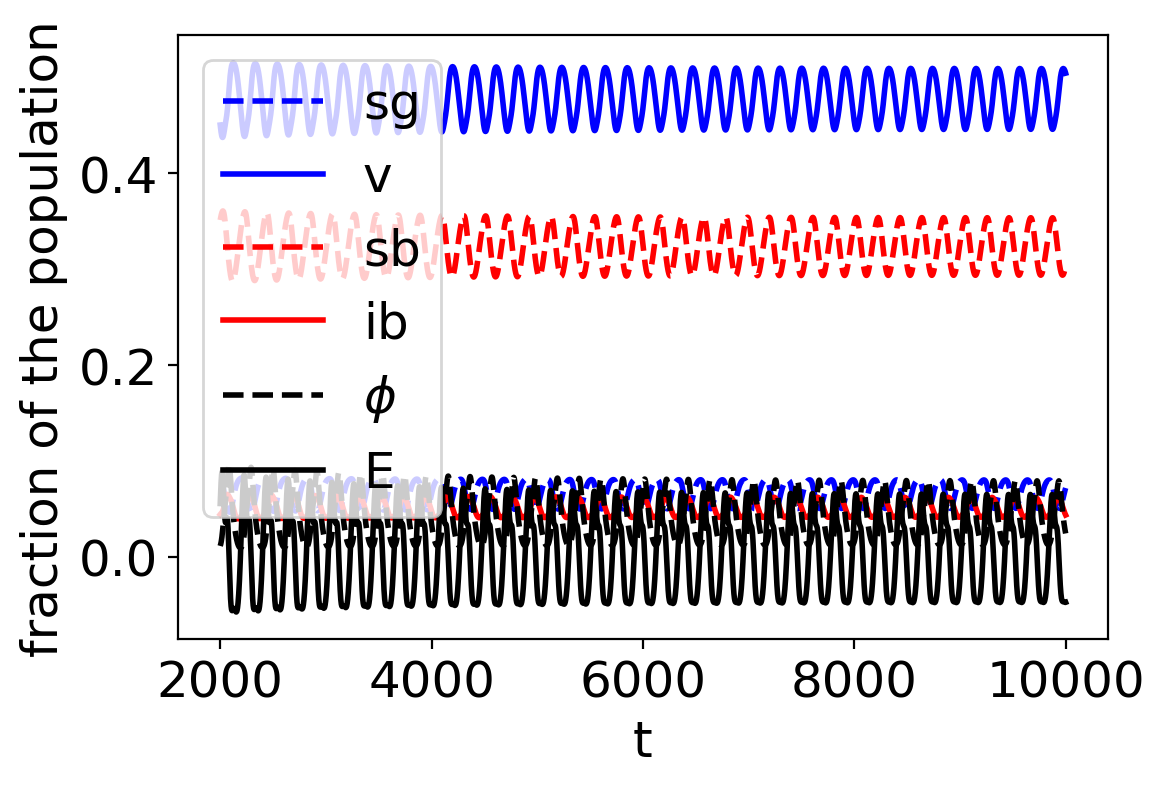

In [7]:
# generate new code for the bifurcation in the new limiting weight of a factor of "a".
# generate the ode

#  change the dicitonary for the initial conditions
par_dict_m = par_dict_mike
ics_dict_m = ics_dict_mike
par_dict_m['m'] = 0.50
par_dict_m['ace'] = 4.00
par_dict_m['risk'] = 1.5
ics_dict_m = {'x1': 0.499, 'x2': 0.50,
                'x3': 0.0001, 'x4': 0.00,
                'x5': 0.50}


z, t = gen_sys(par_dict = par_dict_m, ics_dict = ics_dict_m, tf = 10_000)
sg, sb, ib, v, phi = z.T
ig = 1 - (sg + sb + ib + v)
G = ig + sg
B = sb + ib
S = sg + sb
G = 1 - (B + v)
I = 1 - (S + v)
E = par_dict_m['ace'] * G + I - par_dict_m['risk'] * v

# generate new figures
plt.plot(t[2000:], sg[2000:], 'b--', label = 'sg')
plt.plot(t[2000:], v[2000:], 'b', label = 'v')
plt.plot(t[2000:], sb[2000:], 'r--', label = 'sb')
plt.plot(t[2000:], ib[2000:], 'r', label = 'ib')
plt.plot(t[2000:], phi[2000:], 'k--', label = '$\phi$')
plt.plot(t[2000:], E[2000:], 'k', label = 'E')
plt.xlabel('t')
plt.ylabel('fraction of the population')
plt.legend()
plt.show()



In [ ]:
# revised the following model for the bifurcation
